In [1]:
import os

# import matplotlib.pyplot as plt

# import tools_cvf
# plt.style.use(tools_cvf.get_stylesheets(dark=True))

import weis.tools.viz_toolbox as viz_toolbox

In [2]:
%cd ~/codes/WEIS/examples/17_IEA22_Optimization

/Users/cfrontin/codes/WEIS/examples/17_IEA22_Optimization


In [3]:
# output dirs based on template for ex. 17
dir_template = "32_DesignRound1_%s"
dir_COBYLA = dir_template % "COBYLA"
dir_SLSQP = dir_template % "SLSQP"

# OM log db files
fn_log_COBYLA = os.path.join(dir_COBYLA, "log_opt.sql")
fn_log_SLSQP = os.path.join(dir_SLSQP, "log_opt.sql")

# WEIS stashes design/constraint/objective var files located here
fn_vars_COBYLA = os.path.join(dir_COBYLA, "problem_vars.json")
fn_vars_SLSQP = os.path.join(dir_SLSQP, "problem_vars.json")

In [4]:
# ... load them
vars_COBYLA = viz_toolbox.load_vars_file(fn_vars_COBYLA)
vars_SLSQP = viz_toolbox.load_vars_file(fn_vars_SLSQP)
# this call verifies, (optionally) unifies, and corrects the var files
vars_unified = viz_toolbox.verify_vars(vars_COBYLA, vars_SLSQP)

In [5]:
# load the data from the OM DB
dataOM_COBYLA = viz_toolbox.load_OMsql(fn_log_COBYLA)
dataOM_SLSQP = viz_toolbox.load_OMsql(fn_log_SLSQP)

# describe the keys that have been found
print()
keys_all, _, _ = viz_toolbox.compare_om_data(
  dataOM_COBYLA,
  dataOM_SLSQP,
  "COBYLA", "SLSQP",
  verbose=True,
)
print()

# grab the keys that we have in the unified vars
keys_obj = [v["name"] for k, v in vars_unified["objectives"].items()]
keys_DV = [v["name"] for k, v in vars_unified["design_vars"].items()]
keys_constr = {v["name"]: [v["lower"], v["upper"]] for k, v in vars_unified["constraints"].items()}

viz_toolbox.prettyprint_variables(keys_all, keys_obj, keys_DV, keys_constr)


the following keys are in both COBYLA and SLSQP:
	floatingse.constr_variable_margin
	floatingse.system_structural_mass
	floatingse.constr_fixed_margin
	floatingse.constr_fairlead_wave
	floatingse.constr_freeboard_heel_margin
	raft.Max_PtfmPitch
	floating.memgrp1.outer_diameter_in
	raft.heave_period
	floatingse.metacentric_height
	floatingse.constr_draft_heel_margin
	floating.jointdv_0
	raft.pitch_period
	floating.jointdv_1


<> floatingse.constr_variable_margin
** floatingse.system_structural_mass
<> floatingse.constr_fixed_margin
<> floatingse.constr_fairlead_wave
<> floatingse.constr_freeboard_heel_margin
<> raft.Max_PtfmPitch
-- floating.memgrp1.outer_diameter_in
<> raft.heave_period
<> floatingse.metacentric_height
<> floatingse.constr_draft_heel_margin
-- floating.jointdv_0
<> raft.pitch_period
-- floating.jointdv_1



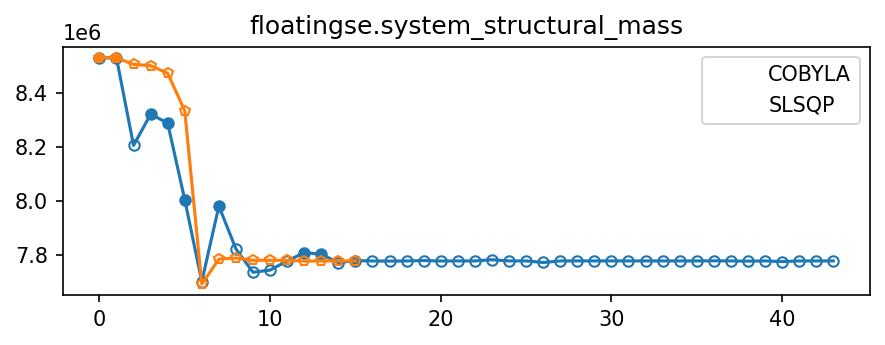

In [6]:
viz_toolbox.plot_conv(
  keys_obj,
  {
    "COBYLA": (dataOM_COBYLA, vars_COBYLA),
    "SLSQP": (dataOM_SLSQP, vars_SLSQP),
  },
) ;

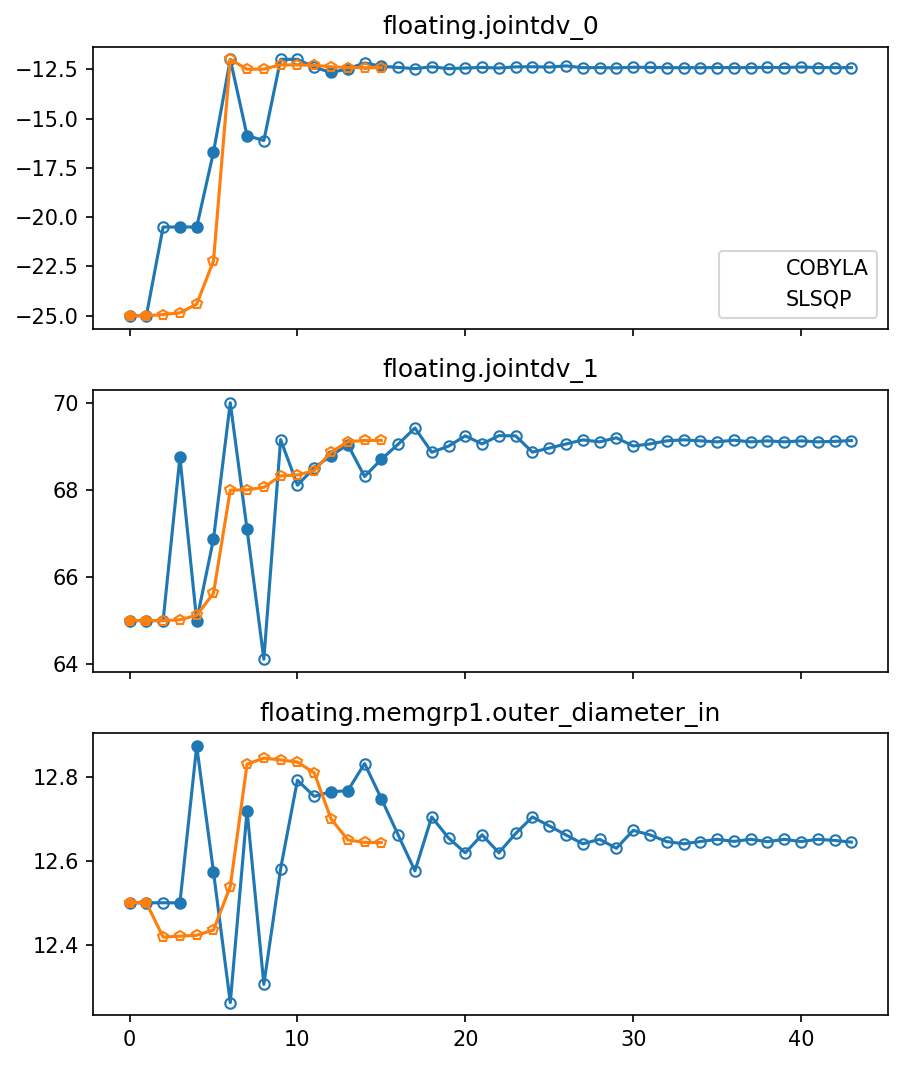

In [7]:
viz_toolbox.plot_conv(
  keys_DV,
  {
    "COBYLA": (dataOM_COBYLA, vars_COBYLA),
    "SLSQP": (dataOM_SLSQP, vars_SLSQP),
  },
) ;

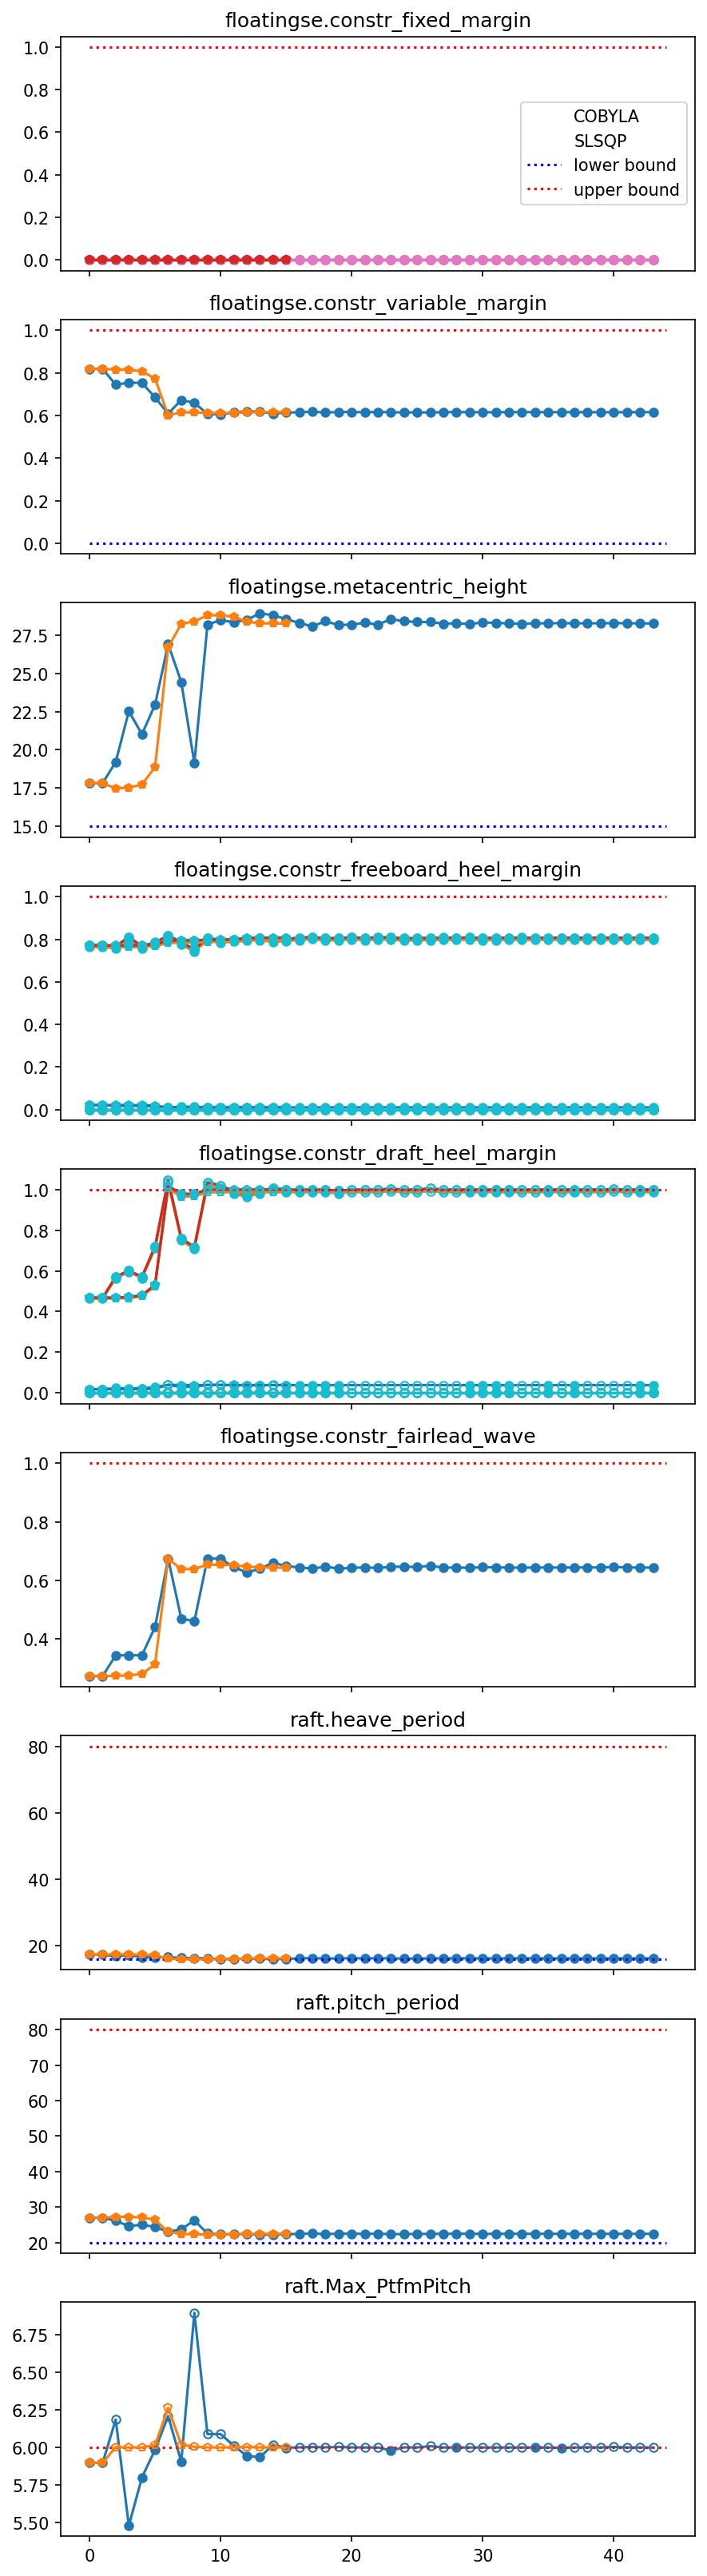

In [8]:
viz_toolbox.plot_conv(
  keys_constr,
  {
    "COBYLA": (dataOM_COBYLA, vars_COBYLA),
    "SLSQP": (dataOM_SLSQP, vars_SLSQP),
  },
  use_casewise_feasibility=True,
) ;